# Background :
The NYC Taxi & Limousine Commission (TLC) is the regulatory body responsible for licensing and regulating New York City's medallion (yellow) taxis, for-hire vehicles (including green Boro Taxis, black cars, and livery cars), commuter vans, and paratransit vehicles. The TLC's mission is to ensure that these services are safe, efficient, and accessible for the public.

# Problem Statement
The NYC Taxi & Limousine Commission (TLC) oversees the regulation of yellow and green taxis in New York City, ensuring the provision of safe, efficient, and accessible transportation services. However, the dynamic nature of urban transportation presents several challenges:

1. Optimizing Fleet Operations: Taxi companies need to manage their fleets efficiently to reduce idle time, meet fluctuating demand, and minimize operational costs.
2. Improving Customer Satisfaction: Understanding passenger behavior and preferences is crucial for enhancing service quality and customer satisfaction.
3. Maximizing Revenue: Identifying factors that influence fare amounts, tips, and additional charges can help in devising strategies to maximize revenue.
4. Regulatory Compliance: Ensuring that all taxi services comply with city regulations regarding fares, surcharges, and reporting requirements.
5. Assessing Weather Impact: Understanding how weather conditions influence the demand for taxi services to improve operational planning and customer service.

# Objective
To address these challenges, we aim to leverage the NYC TLC Trip Record dataset to:

1. Analyze Demand Patterns: Identify peak times, popular routes, and high-demand locations to optimize fleet deployment.
2. Assess Operational Efficiency: Evaluate trip durations, distances, and idle times to improve operational efficiency.
3. Understand Customer Behavior: Analyze passenger counts, payment methods, and tip amounts to gain insights into customer preferences.
4. Revenue Analysis: Break down fare structures and additional charges to identify revenue optimization opportunities.
5. Assess Weather Impact: Evaluate how different weather conditions affect the demand for taxi services to enhance operational decision-making and customer satisfaction.

# Research Questions
1. Demand Analysis:
- What are the peak hours for taxi services?
- Which locations have the highest pickup and dropoff frequencies?

2. Operational Efficiency:
- What are the average trip durations and distances?
- How can fleet deployment be optimized based on trip data?

3. Customer Insights:
- What are the common payment methods used by passengers?
- How do tip amounts vary based on different factors (e.g., trip distance, fare amount)?

4. Revenue Optimization:
- What are the key components of fare amounts?
- What impacting tip amounts

5. Weather Impact:
- How do weather conditions (e.g., rain, snow, temperature) affect the demand for taxi services?
- Are there specific weather conditions that significantly increase or decrease taxi usage?

**Desription of Features**

| Features                  | Description                                                                                                                       |
|---------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
|``VendorID``               | A code indicating the LPEP provider that provided the record.                                                                     |
|                           | 1 = Creative Mobile Technologies, LLC                                                                                             |
|                           | 2 = VeriFone Inc.                                                                                                                 |   
|``lpep_pickup_datetime``   | The date and time when the meter was engaged.                                                                                     |
|``lpep_dropoff_datetime``  | The date and time when the meter was disengaged.                                                                                  |
|``passenger_count``        | The number of passengers in the vehicle. This is a driver-entered value                                                           |
|``trip_distance``          | The elapsed trip distance in miles was reported by the taximeter                                                                  |
|``PULocationID``           | TLC Taxi Zone in which the taximeter was engaged.                                                                                 |
|``DOLocationID``           | TLC Taxi Zone in which the taximeter was disengaged.                                                                              |
|                           |                                                                                                                                   |
|``RatecodeID``             | The final rate code is in effect at the end of the trip.                                                                          |
|                           |1 = Standard rate                                                                                                                  |
|                           |2 = JFK                                                                                                                            |
|                           |3 = Newark                                                                                                                         |
|                           |4 = Nassau or Westchester                                                                                                          |
|                           |5 = Negotiated fare                                                                                                                |
|                           |6 = Group ride.                                                                                                                    |
|``store_and_fwd_flag``     | This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor,                          |
|                           | aka “store and forward,” because the vehicle did not have a connection to the server.                                             |
|                           | Y : store and forward trip                                                                                                        |
|                           | N : not a store and forward trip.                                                                                                 |
|                           |                                                                                                                                   |
|``payment_type``           | A numeric code signifying how the passenger paid for the trip.                                                                    |
|                           |1 = Credit card                                                                                                                    |
|                           |2 = Cash                                                                                                                           |
|                           |3 = No Charge                                                                                                                      |
|                           |4 = Dispute                                                                                                                        |
|                           |5 = Unknown                                                                                                                        |
|                           |6 = Voided Trip                                                                                                                    |
|``fare_amount``            | The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and surcharges.                                 |
|``extra``                  | this only includes the $0.50 and $1 rush hour and overnight charges.                                                              |
|``mta_tax``                | $0.50 MTA tax that is automatically triggered based on the metered rate in use                                                    |
|``improvement_surcharge``  | $0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.      |
|``tip_amount``             | This field is automatically populated for credit card tips. Cash tips are not included.                                           |
|``tolls_amount``           | The total amount of all tolls paid in the trip.                                                                                   |
|``ehail_fee``              | Biaya tambahan sebesar 1 dolar yang otomatis dikenakan untuk setiap perjalanan yang dipesan melalui platform ehail.               |
|``total_amount``           | The total amount charged to passengers.                                                                                           |
|                           | ( Sum of fare amount, extra, mta_tax, improvement_surcharge, tip_amount, tolls_amount and ehail_fee )                             | 
|``trip_type``              | A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based                           |
|                           | on the metered rate in use but can be altered by the driver.                                                                      |
|                           | 1 = Street-hail                                                                                                                   |
|                           | 2 = Dispatch                                                                                                                      |
|``congestion_surcharge``   | The congestion fee of $2.75 applies to trips with yellow and green taxis in southern Manhattan from 96th St.implemented in 2019.  |   

In [1]:
import pandas as pd
import janitor
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
trip_data = pd.read_csv('NYC TLC Trip Record.csv')
zone_lookup = pd.read_csv('taxi_zone_lookup.csv')
weather_data = pd.read_excel('updated_weather_data.xlsx')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_27528\1573509314.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  trip_data = pd.read_csv('NYC TLC Trip Record.csv')


In [3]:
# Displaying the datasets
display(trip_data.head(),zone_lookup.head(),weather_data.head())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


,date,weather_code,weather_description
0,2023-01-01 00:00:00+00:00,51,"Drizzle, not freezing, continuous"
1,2023-01-01 01:00:00+00:00,61,"Rain, not freezing, continuous"
2,2023-01-01 02:00:00+00:00,53,"Drizzle, not freezing, continuous"
3,2023-01-01 03:00:00+00:00,61,"Rain, not freezing, continuous"
4,2023-01-01 04:00:00+00:00,55,"Drizzle, not freezing, continuous"


In [4]:
# Merge trip data with zone lookup data on PULocationID and DOLocationID
trip_data = pd.merge(trip_data, zone_lookup.add_prefix('PU'), left_on="PULocationID", right_on="PULocationID", how="left")
trip_data = pd.merge(trip_data, zone_lookup.add_prefix('DO'), left_on="DOLocationID", right_on="DOLocationID", how="left")

In [5]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [6]:
# Convert lpep_pickup_datetime to datetime format
trip_data['lpep_pickup_datetime'] = pd.to_datetime(trip_data['lpep_pickup_datetime'])

In [7]:
# Add a new column to trip data with pickup_hour (datetime rounded to the nearest hour)
trip_data['pickup_hour'] = trip_data['lpep_pickup_datetime'].dt.floor('H')


C:\Users\lenovo\AppData\Local\Temp\ipykernel_27528\1548767896.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  trip_data['pickup_hour'] = trip_data['lpep_pickup_datetime'].dt.floor('H')


In [8]:
# Convert the weather data 'date' column to datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'])

In [9]:
# Convert pickup_hour to UTC to match the weather data timezone
trip_data['pickup_hour'] = trip_data['pickup_hour'].dt.tz_localize('UTC')

In [10]:
# Merge trip data with weather data based on the closest hour
merged_data = trip_data.merge(weather_data, how='left', left_on='pickup_hour', right_on='date')

In [11]:
# Drop the redundant datetime columns
merged_data.drop(columns=['pickup_hour', 'date'], inplace=True)

In [12]:
# Display the first few rows of the merged data
merged_data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone,weather_code,weather_description
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,51.0,"Drizzle, not freezing, continuous"
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,51.0,"Drizzle, not freezing, continuous"
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone,51.0,"Drizzle, not freezing, continuous"
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,51.0,"Drizzle, not freezing, continuous"
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone,51.0,"Drizzle, not freezing, continuous"


In [13]:
def data_skimming(df):
    skimmed_data = pd.DataFrame({
        'feature': df.columns.values,
        'data_type': df.dtypes.values,
        'null_value(%)': df.isna().mean().values * 100,
        'neg_value(%)': [len(df[df[col] < 0]) / len(df) * 100 if df[col].dtype in [np.float64, np.int64] else 0 for col in df.columns],
        '0_value(%)': [len(df[df[col] == 0]) / len(df) * 100 if df[col].dtype in [np.float64, np.int64] else 0 for col in df.columns],
        'duplicate': df.duplicated().sum(),
        'n_unique': df.nunique().values,
        'sample_unique': [df[col].dropna().unique()[:5] for col in df.columns]  # Limited to 5 unique values for better visibility
    })
    
    return skimmed_data.round(3)

In [14]:
skimming_report = data_skimming(merged_data)
skimming_report

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,VendorID,int64,0.000,0.000,0.000,0,2,"[2, 1]"
1,lpep_pickup_datetime,datetime64[ns],0.000,0.000,0.000,0,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,0.000,0.000,0.000,0,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,6.339,0.000,0.000,0,2,"[N, Y]"
4,RatecodeID,float64,6.339,0.000,0.000,0,6,"[1.0, 5.0, 4.0, 3.0, 2.0]"
5,PULocationID,int64,0.000,0.000,0.000,0,226,"[166, 24, 223, 41, 181]"
6,DOLocationID,int64,0.000,0.000,0.000,0,249,"[143, 43, 179, 238, 74]"
7,passenger_count,float64,6.339,0.000,0.493,0,10,"[1.0, 2.0, 4.0, 3.0, 6.0]"
8,trip_distance,float64,0.000,0.000,4.911,0,1870,"[2.58, 1.81, 0.0, 1.3, 1.1]"
9,fare_amount,float64,0.000,0.258,0.122,0,2553,"[14.9, 10.7, 7.2, 6.5, 6.0]"


# Dropping the unnecessary column
Dropping the unnecessary column such as : 'VendorID', 'store_and_fwd_flag', 'extra', 'mta_tax', 'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'PUservice_zone', 'DOservice_zone', 'weather_code'

In [15]:
# Dropping unnecessary column
cleaned_data = merged_data.drop(columns=['VendorID', 'store_and_fwd_flag', 'extra', 'mta_tax', 'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'PUservice_zone', 'DOservice_zone', 'weather_code'])

In [16]:
# Clean column names to have consistent formatting
cleaned_data = cleaned_data.clean_names()

# EDA (Exploratory Data Analysis)

In [17]:
# Skimming through the datasets
skimming_report = data_skimming(cleaned_data)
skimming_report

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,lpep_pickup_datetime,datetime64[ns],0.000,0.000,0.000,3,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
1,lpep_dropoff_datetime,object,0.000,0.000,0.000,3,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
2,ratecodeid,float64,6.339,0.000,0.000,3,6,"[1.0, 5.0, 4.0, 3.0, 2.0]"
3,pulocationid,int64,0.000,0.000,0.000,3,226,"[166, 24, 223, 41, 181]"
4,dolocationid,int64,0.000,0.000,0.000,3,249,"[143, 43, 179, 238, 74]"
5,passenger_count,float64,6.339,0.000,0.493,3,10,"[1.0, 2.0, 4.0, 3.0, 6.0]"
6,trip_distance,float64,0.000,0.000,4.911,3,1870,"[2.58, 1.81, 0.0, 1.3, 1.1]"
7,fare_amount,float64,0.000,0.258,0.122,3,2553,"[14.9, 10.7, 7.2, 6.5, 6.0]"
8,tip_amount,float64,0.000,0.013,42.251,3,1492,"[4.03, 2.64, 1.94, 1.7, 0.0]"
9,payment_type,float64,6.339,0.000,0.000,3,5,"[1.0, 2.0, 3.0, 4.0, 5.0]"


Data Correlation

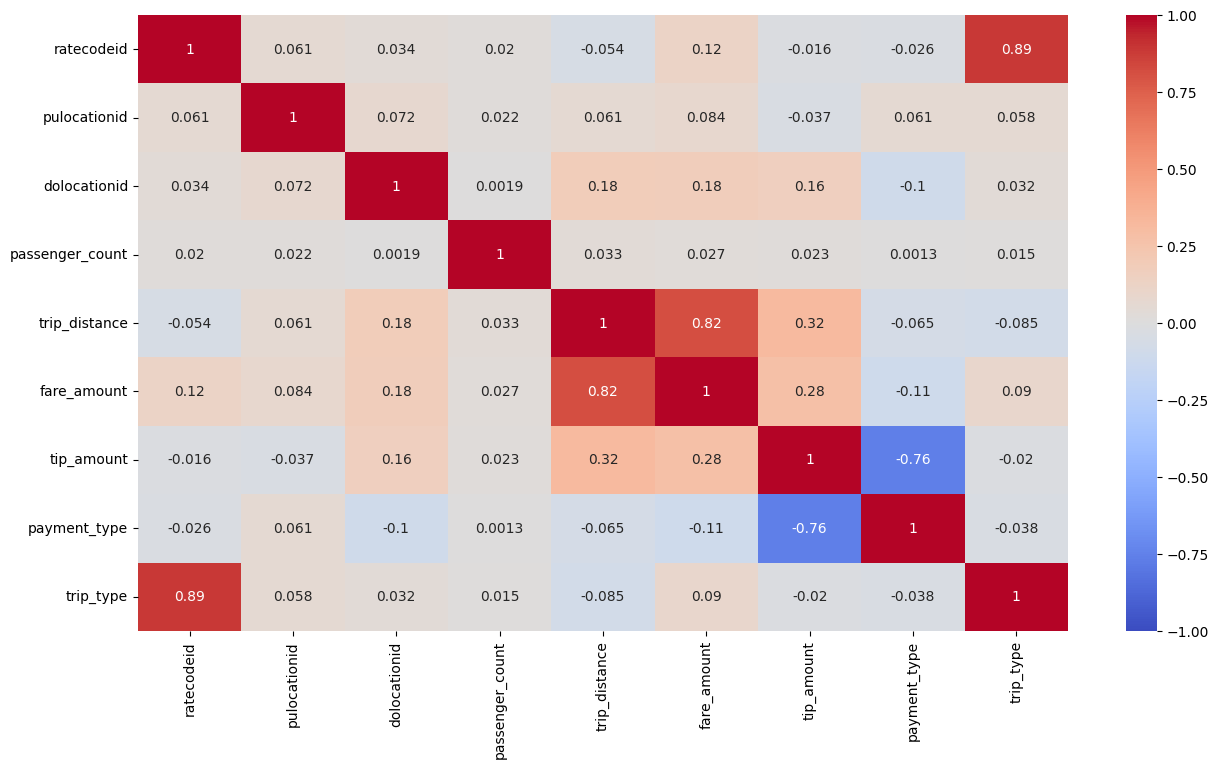

In [18]:
numeric_data = cleaned_data.select_dtypes(include=[np.number])
plt.figure(figsize=(15,8))
sns.heatmap(numeric_data.corr('spearman'), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.show()

- Based on the correlation heatmap while skimming :
  * the 'trip_type' feature is highly influenced by 'ratecodeID' with a correlation value of 0.89.
  * the 'fare_amount' is highly influenced by 'trip_distance' with correlation value of 0.82
  * This moderate positive correlation with correlation value of 0.32 is between 'trip_distance' and 'tip_amount'

# Datetime handling

In [19]:
# Check datetime min and max to determine the ouliers
cleaned_data['lpep_pickup_datetime'].describe()

count                            68211
mean     2023-01-16 20:10:55.679524096
min                2009-01-01 20:21:27
25%         2023-01-09 11:59:47.500000
50%                2023-01-17 08:40:42
75%                2023-01-24 15:52:30
max                2023-02-01 03:10:05
Name: lpep_pickup_datetime, dtype: object

In [20]:
# Checking Outliers
outliers = cleaned_data[(cleaned_data['lpep_pickup_datetime'].dt.month!=1) | (cleaned_data['lpep_pickup_datetime'].dt.year!=2023)]
outliers

,lpep_pickup_datetime,lpep_dropoff_datetime,ratecodeid,pulocationid,dolocationid,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,puborough,puzone,doborough,dozone,weather_description
298,2022-12-09 14:10:49,2022-12-09 14:22:26,1.0,7,56,1.0,5.37,16.0,0.00,2.0,1.0,Queens,Astoria,Queens,Corona,NaN
318,2022-12-09 14:55:42,2022-12-09 15:33:06,1.0,260,164,1.0,5.48,25.5,0.00,2.0,1.0,Queens,Woodside,Manhattan,Midtown South,NaN
17874,2009-01-01 20:21:27,2009-01-02 11:07:31,1.0,65,178,1.0,7.72,34.5,7.20,1.0,1.0,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Ocean Parkway South,NaN
25100,2023-02-01 03:10:05,2023-02-01 03:40:35,5.0,82,198,2.0,4.58,28.0,5.66,1.0,2.0,Queens,Elmhurst,Queens,Ridgewood,NaN


In [21]:
# dropping outliers
cleaned_data.drop(outliers.index, inplace=True)

# ratecodeID handling

According to [rate code](https://www.nyc.gov/site/tlc/passengers/taxi-fare.page) explanation
- When the fare displayed on the screen is `"Rate #01 – Standard City Rate"` it means the trip is within city limits.

- For trips between Manhattan and John F. Kennedy (JFK) Airport in either direction, the fare message on the screen will read `"Rate #2- JFK Airport"`

- For trips to Newark Airport (EWR), the fare message on the screen should read `"Rate #3 - Newark Airport"`

- After the taxi passes the city limits to Nassau or Westchester, the fare message on the screen will read `"Rate #04 – Out of City Rate to Nassau or Westchester"`

- For other points outside the city, the fare message on the screen should read  `"Rate #05 – Out of City Negotiated Flat Rate"`

In [22]:
# Check the value of ratecodeid
print(cleaned_data['ratecodeid'].value_counts())
print(f'Total missing values : {len(cleaned_data[cleaned_data['ratecodeid'].isna()])}')

ratecodeid
1.0     62100
5.0      1528
2.0       158
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64
Total missing values : 4324


It is found there are RatecodeID == 99, this is possibly error in input, so we will take care of this altogether

In [23]:
# Filtering the ratecodeid
cleaned_data[cleaned_data['ratecodeid'] == 99.0]

,lpep_pickup_datetime,lpep_dropoff_datetime,ratecodeid,pulocationid,dolocationid,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,puborough,puzone,doborough,dozone,weather_description
1084,2023-01-01 19:44:13,2023-01-01 19:58:30,99.0,150,55,1.0,3.3,18.2,0.0,1.0,NaN,Brooklyn,Manhattan Beach,Brooklyn,Coney Island,Cloud development not observed or not observable
2174,2023-01-02 16:39:05,2023-01-02 17:31:42,99.0,73,82,1.0,3.7,23.5,0.0,1.0,NaN,Queens,East Flushing,Queens,Elmhurst,Clouds generally forming or developing
9055,2023-01-05 20:33:45,2023-01-05 22:46:41,99.0,14,123,1.0,6.2,28.2,0.0,1.0,NaN,Brooklyn,Bay Ridge,Brooklyn,Homecrest,Clouds generally forming or developing
14125,2023-01-08 11:36:41,2023-01-08 12:14:59,99.0,61,77,1.0,2.7,22.5,0.0,1.0,NaN,Brooklyn,Crown Heights North,Brooklyn,East New York/Pennsylvania Avenue,Cloud development not observed or not observable
29143,2023-01-15 13:51:42,2023-01-15 14:37:38,99.0,108,181,1.0,6.5,24.2,0.0,1.0,NaN,Brooklyn,Gravesend,Brooklyn,Park Slope,Cloud development not observed or not observable
29711,2023-01-15 17:52:52,2023-01-15 22:11:55,99.0,150,123,1.0,1.6,15.2,0.0,1.0,NaN,Brooklyn,Manhattan Beach,Brooklyn,Homecrest,Cloud development not observed or not observable
35975,2023-01-19 01:07:59,2023-01-19 01:17:19,99.0,90,68,1.0,0.6,15.2,0.0,1.0,NaN,Manhattan,Flatiron,Manhattan,East Chelsea,Cloud development not observed or not observable
37691,2023-01-19 17:16:59,2023-01-19 22:29:53,99.0,265,123,1.0,14.6,40.2,0.0,1.0,NaN,NaN,Outside of NYC,Brooklyn,Homecrest,"Drizzle, not freezing, continuous"
42432,2023-01-21 20:29:58,2023-01-22 02:59:25,99.0,150,123,1.0,1.4,15.2,0.0,1.0,NaN,Brooklyn,Manhattan Beach,Brooklyn,Homecrest,Clouds generally forming or developing
45204,2023-01-23 13:45:11,2023-01-23 23:36:42,99.0,244,248,1.0,28.3,50.2,0.0,1.0,NaN,Manhattan,Washington Heights South,Bronx,West Farms/Bronx River,"Drizzle, not freezing, continuous"


In [24]:
# Replace ratecodeid == 99 into NaN into further processing
cleaned_data['ratecodeid'] = cleaned_data['ratecodeid'].replace(99, np.nan)

In [25]:
# Function to update ratecodeid based only on conditions when ratecodeid is NaN
def update_ratecodeid(row):
    if pd.isna(row['ratecodeid']):
        if row['puborough'] == 'Manhattan' and row['dozone'] == 'JFK Airport':
            return 2
        if row['puzone'] == 'JFK Airport' and row['doborough'] == 'Manhattan':
            return 2
        if row['dozone'] == 'Newark Airport':
            return 3
        if row['doborough'] == 'Nassau' or row['doborough'] == 'Westchester':
            return 4
        if row['doborough'] == 'Outside of NYC' and row['dozone'] != 'Newark Airport':
            return 5
        return 1
    else:
        return row['ratecodeid']

In [26]:
# Apply the updated function to the DataFrame
cleaned_data['ratecodeid'] = cleaned_data.apply(update_ratecodeid, axis=1)

In [27]:
# Check the value of ratecodeid
print(cleaned_data['ratecodeid'].value_counts())
print(f'Total missing values : {len(cleaned_data[cleaned_data['ratecodeid'].isna()])}')

ratecodeid
1.0    66385
5.0     1528
2.0      203
4.0       57
3.0       34
Name: count, dtype: int64
Total missing values : 0


In [28]:
cleaned_data['ratecodeid'] = cleaned_data['ratecodeid'].replace({1:'Standard rate', 2:'JFK Airport', 3:'Newark Airport', 4:'Nassau or Westchester', 5:'Negotiated fare', 6:'Group ride'})

# passenger_count handling

In [29]:
# Check the value of passenger_count
print(cleaned_data['passenger_count'].value_counts())
print(f'Total missing values : {len(cleaned_data[cleaned_data['passenger_count'].isna()])}')

passenger_count
1.0    54296
2.0     5095
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64
Total missing values : 4324


For passenger_count missing value we can use the median value of the column

In [30]:
# Median of passenger_count
print(f'passenger_count median : {cleaned_data['passenger_count'].median()}')

passenger_count median : 1.0


In [31]:
# Replacing the missing value of passenger_count with the median
cleaned_data['passenger_count'].fillna(cleaned_data['passenger_count'].median(), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_27528\2478621540.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data['passenger_count'].fillna(cleaned_data['passenger_count'].median(), inplace=True)


In [32]:
# Check the value of passenger_count
print(cleaned_data['passenger_count'].value_counts())
print(f'Total missing values : {len(cleaned_data[cleaned_data['passenger_count'].isna()])}')

passenger_count
1.0    58620
2.0     5095
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64
Total missing values : 0


From the value counts of column 'passenger_count' above, we could see there are 336 data of passenger_count that equal to 0, there are possibility that the driver made a input error, so we will replace it with the central tendency of 'passenger_count'

And there are several data that shows the passenger_count in a single vehicle is more than 5. According to the [regulation](https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page):
The maximum number of passengers allowed in a taxi is 4 or 5 passengers, except that an additional passenger must be accepted if they are under seven (7) years old and are held on the lap of an adult passenger seated in the rear.

In [33]:
# replacing value of passenger_count that equal to 0 with its central tendency
cleaned_data['passenger_count'] = cleaned_data['passenger_count'].replace(0, cleaned_data['passenger_count'].median())

In [34]:
# categorizing the outliers of passenger count
cleaned_data['passenger_count'] = cleaned_data['passenger_count'].apply(lambda x: '>5' if x>5 else str(x))

In [35]:
# Check the value of passenger_count
print(cleaned_data['passenger_count'].value_counts())
print(f'Total missing values : {len(cleaned_data[cleaned_data['passenger_count'].isna()])}')

passenger_count
1.0    58956
2.0     5095
5.0     1772
>5      1062
3.0      958
4.0      364
Name: count, dtype: int64
Total missing values : 0


# trip_distance handling

in data skimming above, we can see that there are 4.911% of 0 value in the trip_distance row.
Assuming that a taxi trip covering a distance of less than 0.2 miles is an abnormal record or a failed record, such as the possibility of a passenger or driver canceling the order, the dataset with these values will be dropped.

In [36]:
# Filtering the trip_distance
cleaned_data[cleaned_data['trip_distance'] == 0]

,lpep_pickup_datetime,lpep_dropoff_datetime,ratecodeid,pulocationid,dolocationid,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,puborough,puzone,doborough,dozone,weather_description
2,2023-01-01 00:35:12,2023-01-01 00:41:32,Standard rate,223,179,1.0,0.0,7.20,1.94,1.0,1.0,Queens,Steinway,Queens,Old Astoria,"Drizzle, not freezing, continuous"
58,2023-01-01 00:57:15,2023-01-01 01:00:15,Standard rate,75,75,1.0,0.0,4.40,1.38,1.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South,"Drizzle, not freezing, continuous"
99,2023-01-01 01:27:36,2023-01-01 01:27:43,Negotiated fare,168,168,1.0,0.0,20.00,0.00,1.0,2.0,Bronx,Mott Haven/Port Morris,Bronx,Mott Haven/Port Morris,"Rain, not freezing, continuous"
107,2023-01-01 01:11:13,2023-01-01 01:11:36,Standard rate,7,7,1.0,0.0,3.00,9.00,1.0,1.0,Queens,Astoria,Queens,Astoria,"Rain, not freezing, continuous"
115,2023-01-01 01:52:58,2023-01-01 01:53:00,Standard rate,264,264,1.0,0.0,3.00,21.50,1.0,1.0,Unknown,NaN,Unknown,NaN,"Rain, not freezing, continuous"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68014,2023-01-30 13:29:00,2023-01-30 14:15:00,Standard rate,14,75,1.0,0.0,51.12,1.17,NaN,NaN,Brooklyn,Bay Ridge,Manhattan,East Harlem South,Clouds generally dissolving or becoming less d...
68112,2023-01-31 08:36:00,2023-01-31 08:51:00,Standard rate,41,75,1.0,0.0,15.56,0.00,NaN,NaN,Manhattan,Central Harlem,Manhattan,East Harlem South,Clouds generally forming or developing
68136,2023-01-31 11:10:20,2023-01-31 11:45:20,JFK Airport,42,132,1.0,0.0,70.50,10.80,NaN,NaN,Manhattan,Central Harlem North,Queens,JFK Airport,"Drizzle, not freezing, continuous"
68161,2023-01-31 13:53:00,2023-01-31 14:17:00,Standard rate,7,145,1.0,0.0,23.43,4.89,NaN,NaN,Queens,Astoria,Queens,Long Island City/Hunters Point,Continuous fall of snowflakes


In [37]:
# Dropping trip_distance == 0
cleaned_data = cleaned_data[cleaned_data['trip_distance']>0]

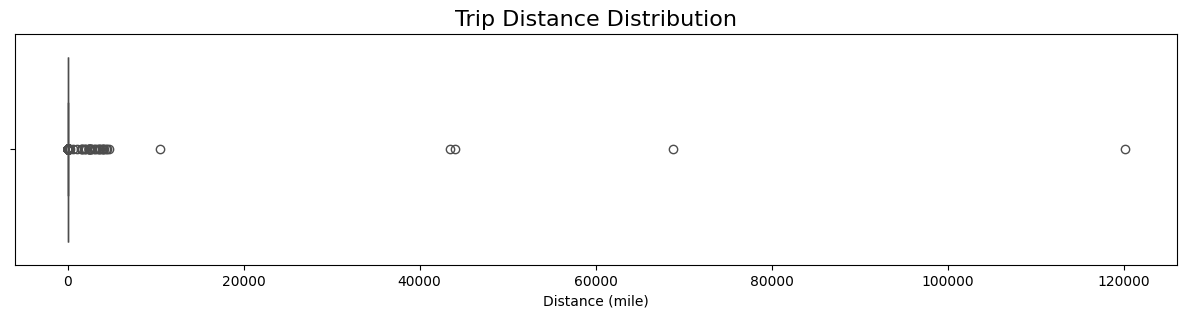

In [38]:
# Check the distribution of trip_distance
plt.figure(figsize=(15, 3))

sns.boxplot(data=cleaned_data, x='trip_distance', color='blue')
plt.xlabel('Distance (mile)')
plt.title('Trip Distance Distribution', fontsize=16)

plt.show()

From the boxplot above it can be seen that the data distributio is extremely skewed right.
first we will handle it by filtering the data for trip less than 50 miles.

Why 50 miles ?

Traveling 50 miles by taxi from the center of New York City can be considered relatively far, both in terms of cost and time. Here are some key points:
* Cost
    A 50-mile taxi ride in New York City can be quite expensive. According to TaxiFareFinder, taxi fare estimates for significant trips like JFK Airport to Manhattan can range around $52 plus additional surcharges like tolls and peak-hour fees. For a trip of approximately 50 miles, the fare could easily exceed $100, considering the standard rates and additional charges.
* Time
    The time taken for a 50-mile trip can vary significantly based on traffic conditions. On a good day, it might take about an hour, but during peak traffic times, it could take much longer, potentially two hours or more.
* Surcharges
    There are various surcharges that can apply to taxi rides in New York City, including peak-hour surcharges, night surcharges, and specific fees for travel to and from airports. These additional costs can add up, making long-distance taxi rides more expensive.
* Sources
    - [TaxiFareFinder](https://www.taxifarefinder.com/main.php?city=NY&from=JFK+Airport&to=Manhattan)
    - [Estimate.Taxi](https://www.estimate.taxi/rates/united-states/new-york)
    - [The Pricer](https://www.thepricer.org/how-much-does-a-taxi-cost/)


Based on that argument, we will mark any trip above 50 miles as 'Extreme Outliers'

In [39]:
# Extreme outliers
cleaned_data[cleaned_data['trip_distance']>50][['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'pulocationid', 'dolocationid', 'trip_distance', 'fare_amount']].sort_values(by='trip_distance', ascending=True).head()

,lpep_pickup_datetime,lpep_dropoff_datetime,pulocationid,dolocationid,trip_distance,fare_amount
48770,2023-01-24 22:56:13,2023-01-25 19:43:58,179,264,53.72,0.01
43013,2023-01-22 10:39:49,2023-01-22 11:48:18,82,265,57.09,205.30
7322,2023-01-05 09:00:03,2023-01-05 15:18:38,134,134,66.18,15.00
64695,2023-01-06 14:16:00,2023-01-06 14:59:00,82,130,137.95,44.90
66580,2023-01-20 09:16:00,2023-01-20 09:59:00,133,90,254.65,45.44


From the data that we filtered above, there are an anomaly where the trip distance is more than 100 miles, but the fare amount is less than the other even when the trip distance is lower, and when you look at the trip_distance == 254,65 the trip time is 43 minutes, for a taxi to cover 254 miles in 43 minutes it means that the taxi is travelling at approximately 355.33 miles per hour

In [40]:
# Dropping the extreme outlier
cleaned_data = cleaned_data[cleaned_data['trip_distance'] <= 50]

In [41]:
# Showing trip distance below 0.2 miles
cleaned_data[cleaned_data['trip_distance'] <= 0.2]

,lpep_pickup_datetime,lpep_dropoff_datetime,ratecodeid,pulocationid,dolocationid,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,puborough,puzone,doborough,dozone,weather_description
104,2023-01-01 01:11:01,2023-01-01 01:11:06,Negotiated fare,179,179,2.0,0.01,190.00,0.00,2.0,2.0,Queens,Old Astoria,Queens,Old Astoria,"Rain, not freezing, continuous"
146,2023-01-01 02:03:52,2023-01-01 02:03:57,Standard rate,169,169,2.0,0.01,3.00,0.00,2.0,1.0,Bronx,Mount Hope,Bronx,Mount Hope,"Drizzle, not freezing, continuous"
163,2023-01-01 01:59:48,2023-01-01 01:59:51,Negotiated fare,36,36,2.0,0.09,100.00,20.06,1.0,2.0,Brooklyn,Bushwick North,Brooklyn,Bushwick North,"Rain, not freezing, continuous"
208,2023-01-01 03:49:01,2023-01-01 03:50:37,Negotiated fare,157,157,4.0,0.03,50.00,0.00,1.0,2.0,Queens,Maspeth,Queens,Maspeth,"Rain, not freezing, continuous"
214,2023-01-01 03:11:03,2023-01-01 03:11:09,Negotiated fare,61,61,2.0,0.04,30.00,1.00,1.0,2.0,Brooklyn,Crown Heights North,Brooklyn,Crown Heights North,"Rain, not freezing, continuous"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66264,2023-01-18 16:41:00,2023-01-18 16:44:00,Standard rate,11,11,1.0,0.01,48.19,0.92,NaN,NaN,Brooklyn,Bath Beach,Brooklyn,Bath Beach,Clouds generally dissolving or becoming less d...
67371,2023-01-25 17:30:00,2023-01-25 17:31:00,Standard rate,82,82,1.0,0.09,20.35,1.58,NaN,NaN,Queens,Elmhurst,Queens,Elmhurst,Clouds generally forming or developing
67466,2023-01-26 10:10:00,2023-01-26 10:12:00,Standard rate,7,193,1.0,0.20,17.18,1.82,NaN,NaN,Queens,Astoria,Queens,Queensbridge/Ravenswood,"Drizzle, not freezing, continuous"
67478,2023-01-26 12:09:00,2023-01-26 12:10:00,Standard rate,17,225,1.0,0.02,25.81,7.71,NaN,NaN,Brooklyn,Bedford,Brooklyn,Stuyvesant Heights,State of sky on the whole unchanged


In [42]:
# Dropping the trip_distance below 0.2 miles
cleaned_data = cleaned_data[cleaned_data['trip_distance'] > 0.2]

We'll handle 'normal' outliers by separating them into several bins

In [43]:
# Binning of trip distance
bins_of_distance = [0, 2, 6, 10, np.inf] 
labels_of_distance = ['<2 miles', '3-6 miles', '7-10 miles', '>10 miles']

cleaned_data['distance_bins'] = pd.cut(cleaned_data['trip_distance'], bins=bins_of_distance, labels=labels_of_distance)

In [44]:
cleaned_data['distance_bins'].value_counts()

distance_bins
<2 miles      33015
3-6 miles     24749
7-10 miles     4642
>10 miles      1692
Name: count, dtype: int64

# fare_amount handling

in the data skimming we found fare_amount has 0.081% of negative values and 0.023% of 0 values.

In [45]:
# dropping the fare_amount == 0
cleaned_data = cleaned_data[cleaned_data['fare_amount'] > 0]

In [46]:
# negative value handling
negative_value  = cleaned_data[cleaned_data['fare_amount']<0]
cleaned_data.loc[negative_value.index, 'fare_amount'] = cleaned_data['fare_amount'].abs()

# payment_type handling

based on the skimming above, payment_type has 6.423% of null value, we'll handle this based on the description of feature above, we know that tips for credit card payments will be automatically filled in. Therefore, it can be concluded that if tips > 0, the payment method used is a credit card

In [47]:
# Check the value of paymet_type
print(cleaned_data['payment_type'].value_counts())
print('Total NaN values: ', len(cleaned_data[cleaned_data['payment_type'].isna()]))

payment_type
1.0    38222
2.0    21499
3.0      163
4.0       34
Name: count, dtype: int64
Total NaN values:  4113


In [48]:
# Filtering and counting the payment types where tip_amount is greater than 0
cleaned_data[(cleaned_data['tip_amount']>0)]['payment_type'].value_counts()

payment_type
1.0    34705
2.0        1
Name: count, dtype: int64

In [49]:
# set payment_type to 1 where tip_amount > 0 and payment_type == 2
cleaned_data.loc[(cleaned_data['tip_amount'] > 0) & (cleaned_data['payment_type'] == 2), 'payment_type'] = 1
cleaned_data[(cleaned_data['tip_amount'] >0)]['payment_type'].value_counts()

payment_type
1.0    34706
Name: count, dtype: int64

In [50]:
# Update payment_type for NaN values based on tip_amount
cleaned_data.loc[cleaned_data['payment_type'].isna(), 'payment_type'] = cleaned_data['tip_amount'].apply(lambda x: 1.0 if x > 0.0 else 5.0)
cleaned_data['payment_type'].value_counts()

payment_type
1.0    41903
2.0    21498
5.0      433
3.0      163
4.0       34
Name: count, dtype: int64

based on data skimming above column trip_type have 6.354% of missing value, so we need to handle it by filling the data

In [51]:
# check the distribution of ratecodeid to the respective trip_type
cleaned_data.groupby(['ratecodeid', 'trip_type']).agg(total=('trip_type', 'count'))

total
ratecodeid            trip_type       
JFK Airport           1.0          118
Nassau or Westchester 1.0           51
                      2.0            2
Negotiated fare       1.0           97
                      2.0          671
Newark Airport        1.0           16
Standard rate         1.0        58951
                      2.0            2

Based on information from the dataset, 99% of RatecodeID = 1 has a trip_type value of 1, while Ratecode 2 and 3 all have a trip_type of 1.

In [52]:
# check the missing value ratecodeid
cleaned_data[cleaned_data['trip_type'].isna()].groupby('ratecodeid').agg(total=('ratecodeid', 'count'))

,total
ratecodeid,
JFK Airport,41
Newark Airport,1
Standard rate,4081


In [53]:
# filling the missing value
cleaned_data['trip_type'] = cleaned_data['trip_type'].fillna(1)

In [54]:
cleaned_data['trip_type'].value_counts()

trip_type
1.0    63356
2.0      675
Name: count, dtype: int64

for the rest of the column such as puborough, puzone, doborough, dozone, weather_description we will drop the rows if it had missing value since the percentage of the missing values is below 5% threshold

In [55]:
cleaned_data = cleaned_data.dropna()

# payment_type handling

In [56]:
cleaned_data['payment_type']=cleaned_data['payment_type'].replace({1:'Credit card', 2:'Cash', 3:'No charge', 4:'Dispute', 5:'Unknown', 6:'Voided trip'})
cleaned_data['payment_type'].value_counts()

payment_type
Credit card    41767
Cash           21350
Unknown          430
No charge        161
Dispute           34
Name: count, dtype: int64

# Additional data

Trip Duration calculation

In [57]:
# converting dropoff_datetime to datetime
cleaned_data['lpep_dropoff_datetime'] = pd.to_datetime(cleaned_data['lpep_dropoff_datetime'])

In [58]:
# creating trip duration
diff = (cleaned_data['lpep_dropoff_datetime'] - cleaned_data['lpep_pickup_datetime']).dt.total_seconds()/60
cleaned_data['trip_duration'] = diff.round(2)

now we see the distribution of trip duration

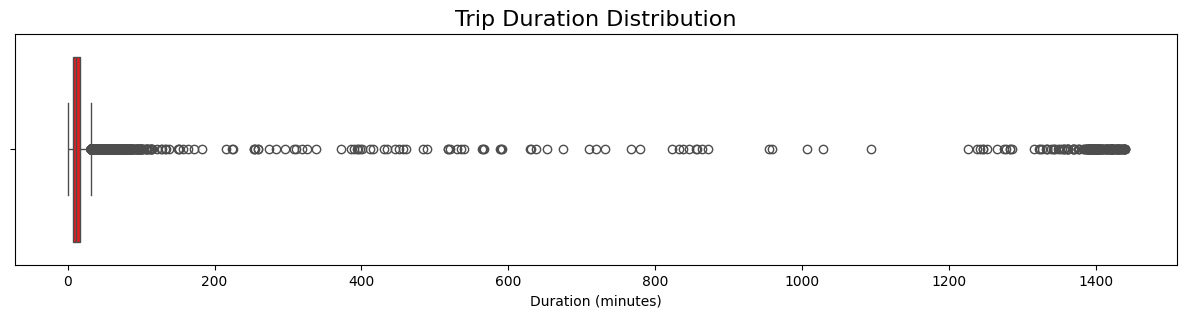

In [59]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=cleaned_data, x='trip_duration', color='red')
plt.xlabel('Duration (minutes)')
plt.title('Trip Duration Distribution', fontsize=16)


plt.show()

for a taxi trip to spend around less than 2 minutes to complete the trip is something unusual, so we will drop any trip duration that less than 2 minutes since it have the possibility of a failed trips

In [60]:
# print the total trip that less than 2 minutes
print('Total trip that less than 2 minutes:', len(cleaned_data[cleaned_data['trip_duration']<=2]))

Total trip that less than 2 minutes: 468


In [61]:
# dropping the total trip that less than 2 minutes
cleaned_data = cleaned_data[cleaned_data['trip_duration'] > 2]

now lets handle the outliers,
we'll use the longest distance recorded in this datasets, and we'll do calculation with lowest [average speed](https://nypost.com/2023/03/13/nyc-drivers-travel-just-12-mph-during-rush-hour/) in New York City that has been recorded as of 2023 which is 12 mph to get the benchmark.

In [62]:
# fetching longest trip distance
print(f'longest trip recorded in datasets : {cleaned_data['trip_distance'].max()} miles')

longest trip recorded in datasets : 41.74 miles


In [63]:
# computation of trip duration benchmark
longest = cleaned_data['trip_distance'].max()
duration = longest / 12
duration = (duration.round(2)) * 60
print(f'benchmark for duration : {duration} minutes')

benchmark for duration : 208.8 minutes


In [64]:
# total of outlier
outliers = cleaned_data[cleaned_data['trip_duration'] > 208.5]
print('Total extreme outliers : ', len(outliers))

Total extreme outliers :  240


In [65]:
# percentage of outlier
percentage = (len(outliers)/len(cleaned_data)) * 100
print(f'percentage of outlier in trip_duration : {percentage}')

percentage of outlier in trip_duration : 0.3793027151752695


since the percentage of outlier is still below 5% treshold we can drop the outlier

In [66]:
# dropping outlier
cleaned_data = cleaned_data[cleaned_data['trip_duration'] < 208.5]

In [67]:
# check if any missing value
cleaned_data[cleaned_data['trip_duration'].isna()]

,lpep_pickup_datetime,lpep_dropoff_datetime,ratecodeid,pulocationid,dolocationid,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,puborough,puzone,doborough,dozone,weather_description,distance_bins,trip_duration


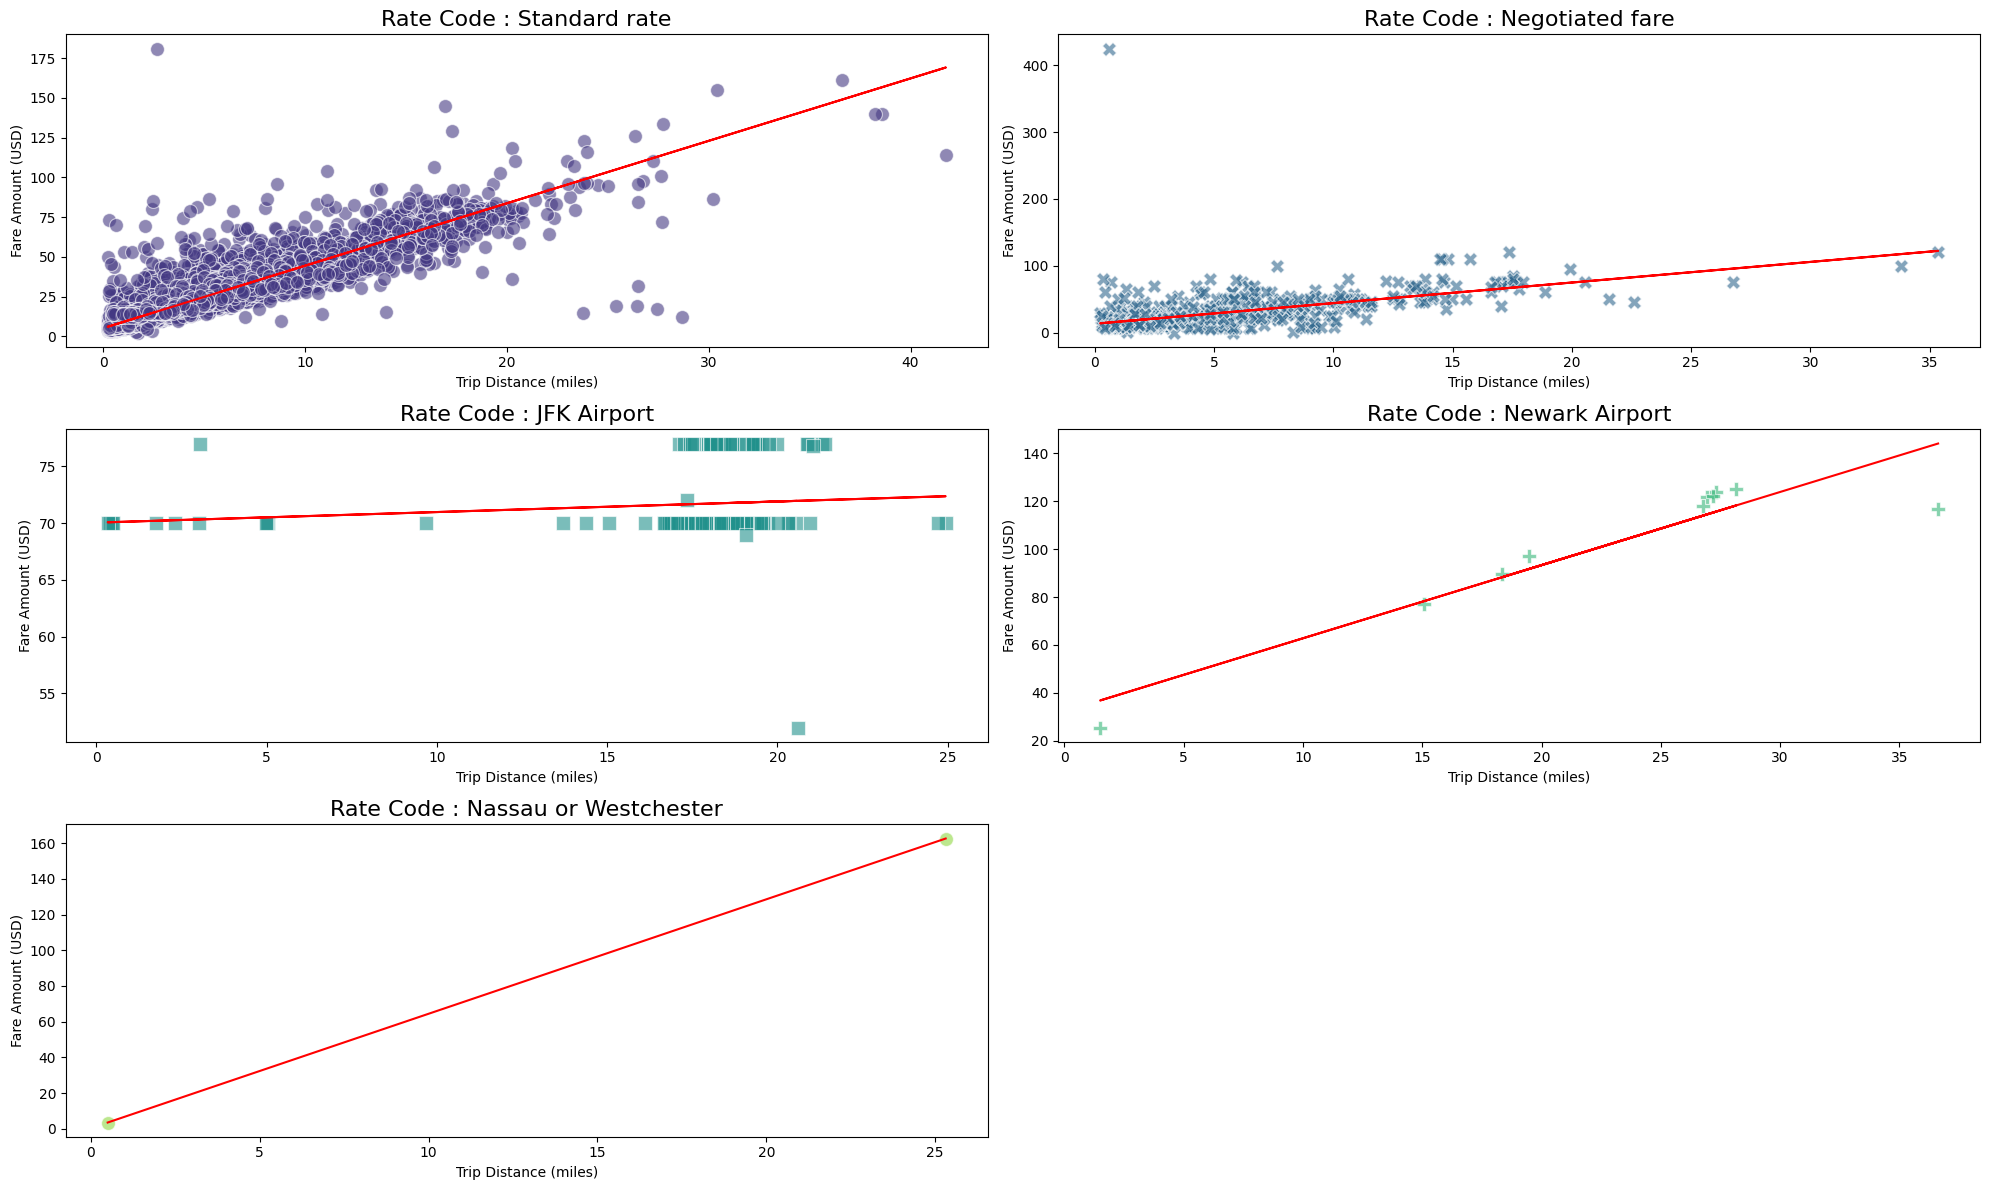

In [68]:
# Get unique ratecodeid values
ratecode_ids = cleaned_data['ratecodeid'].unique()

# Create a figure
plt.figure(figsize=(20, 12))

# Define a color palette and markers
palette = sns.color_palette("viridis", len(ratecode_ids))
markers = ['o', 'X', 's', 'P']

# Plot each ratecodeid in a subplot
for i, ratecode in enumerate(ratecode_ids):
    plt.subplot(3, 2, i + 1)  # Adjust the subplot layout as needed
    subset = cleaned_data[cleaned_data['ratecodeid'] == ratecode]
    
    # Scatter plot
    sns.scatterplot(data=subset, x='trip_distance', y='fare_amount', color=palette[i], marker=markers[i % len(markers)], alpha=0.6, s=100)
    
    # Add trend line
    x = subset['trip_distance']
    y = subset['fare_amount']
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m * x + b, color='red')
    
    plt.title(f'Rate Code : {ratecode}', fontsize=16)
    plt.xlabel('Trip Distance (miles)')
    plt.ylabel('Fare Amount (USD)')

plt.tight_layout()
plt.show()

In [69]:
outliers = pd.DataFrame()

# Creating masks for Standard rate
mask_sr_1 = (cleaned_data['ratecodeid'] == 'Standard rate') & (cleaned_data['fare_amount'] > 120) & (cleaned_data['trip_distance'] < 20)
mask_sr_2 = (cleaned_data['ratecodeid'] == 'Standard rate') & (cleaned_data['fare_amount'] < 60) & (cleaned_data['trip_distance'] > 20)
mask_sr_3 = (cleaned_data['ratecodeid'] == 'Standard rate') & (cleaned_data['fare_amount'] > 150) & (cleaned_data['trip_distance'] < 30)
sr_outlier = cleaned_data[mask_sr_1 | mask_sr_2 | mask_sr_3]
outliers = pd.concat([outliers, sr_outlier])

# Creating masks for Negotiated fare
mask_nf_1 = (cleaned_data['ratecodeid'] == 'Negotiated fare') & (cleaned_data['fare_amount'] > 99) & (cleaned_data['trip_distance'] < 20)
mask_nf_2 = (cleaned_data['ratecodeid'] == 'Negotiated fare') & (cleaned_data['fare_amount'] < 5) & (cleaned_data['trip_distance'] < 10)
mask_nf_3 = (cleaned_data['ratecodeid'] == 'Negotiated fare') & (cleaned_data['fare_amount'] < 60) & (cleaned_data['trip_distance'] > 20)
mask_nf_4 = (cleaned_data['ratecodeid'] == 'Negotiated fare') & (cleaned_data['fare_amount'] > 60) & (cleaned_data['trip_distance'] < 10)
nf_outlier = cleaned_data[mask_nf_1 | mask_nf_2 | mask_nf_3 | mask_nf_4]
outliers = pd.concat([outliers, nf_outlier])

# Creating mask for JFK Airport rate
mask_jfk = (cleaned_data['ratecodeid'] == 'JFK Airport') & (cleaned_data['fare_amount'] < 70)
jfk_outlier = cleaned_data[mask_jfk]
outliers = pd.concat([outliers, jfk_outlier])

# Creating mask for Newark Airport rate
mask_ewr = (cleaned_data['ratecodeid'] == 'Newark Airport') & (cleaned_data['fare_amount'] > 160)
ewr_outlier = cleaned_data[mask_ewr]
outliers = pd.concat([outliers, ewr_outlier])

print('Total standard rate outlier:', len(sr_outlier))
print('Total negotiated rate outlier:', len(nf_outlier))
print('Total JFK airport outlier:', len(jfk_outlier))
print('Total Newark airport outlier:', len(ewr_outlier))
print('Total seluruh outlier:', len(outliers))

Total standard rate outlier: 11
Total negotiated rate outlier: 25
Total JFK airport outlier: 2
Total Newark airport outlier: 0
Total seluruh outlier: 38


In [70]:
# dropping outlier
cleaned_data = cleaned_data.drop(outliers.index)

Testing wether trip_duration and trip_distance contributing to tip_amount

In [77]:
# Select relevant columns
relevant_data = cleaned_data[['trip_distance', 'trip_duration', 'tip_amount']]

# Compute the correlation matrix
correlation_matrix = relevant_data.corr()
correlation_matrix

,trip_distance,trip_duration,tip_amount
trip_distance,1.000000,0.759808,0.391465
trip_duration,0.759808,1.000000,0.309232
tip_amount,0.391465,0.309232,1.000000


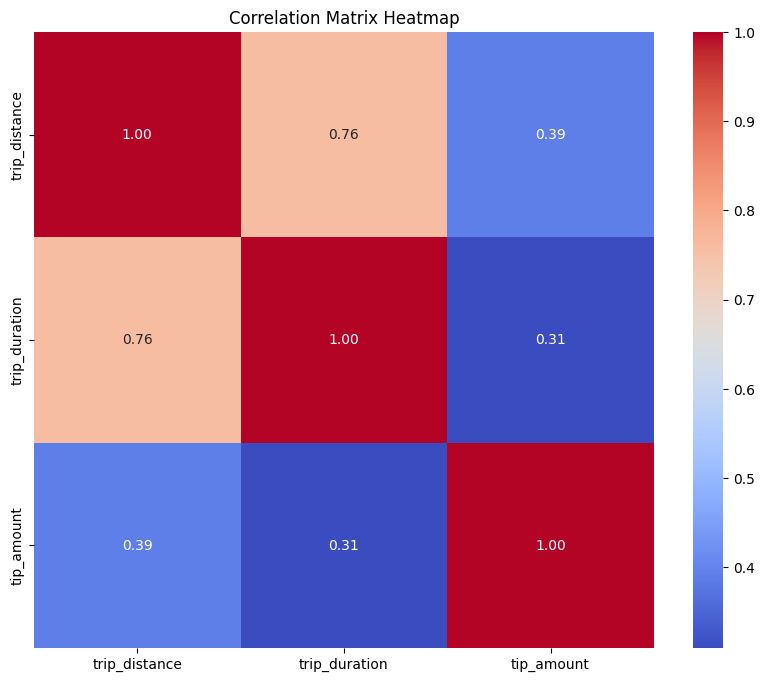

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

There is possitive correlation between tip_amount and trip_distance ( 0.39 ) and tip_amount and trip_duration ( 0.31 ) this means that the higher the distance and the duration resulting in higher tip_amount

In [71]:
cleaned_data.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'ratecodeid',
       'pulocationid', 'dolocationid', 'passenger_count', 'trip_distance',
       'fare_amount', 'tip_amount', 'payment_type', 'trip_type', 'puborough',
       'puzone', 'doborough', 'dozone', 'weather_description', 'distance_bins',
       'trip_duration'],
      dtype='object')

In [72]:
final_data = cleaned_data[['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'ratecodeid', 'pulocationid','puborough', 'puzone', 'dolocationid', 'doborough', 'dozone', 'passenger_count', 'trip_distance', 'distance_bins', 'fare_amount', 'tip_amount', 'payment_type', 'trip_type', 'trip_duration', 'weather_description']]
final_data

,lpep_pickup_datetime,lpep_dropoff_datetime,ratecodeid,pulocationid,puborough,puzone,dolocationid,doborough,dozone,passenger_count,trip_distance,distance_bins,fare_amount,tip_amount,payment_type,trip_type,trip_duration,weather_description
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard rate,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1.0,2.58,3-6 miles,14.90,4.03,Credit card,1.0,11.02,"Drizzle, not freezing, continuous"
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard rate,24,Manhattan,Bloomingdale,43,Manhattan,Central Park,1.0,1.81,<2 miles,10.70,2.64,Credit card,1.0,6.77,"Drizzle, not freezing, continuous"
3,2023-01-01 00:13:14,2023-01-01 00:19:03,Standard rate,41,Manhattan,Central Harlem,238,Manhattan,Upper West Side North,1.0,1.30,<2 miles,6.50,1.70,Credit card,1.0,5.82,"Drizzle, not freezing, continuous"
4,2023-01-01 00:33:04,2023-01-01 00:39:02,Standard rate,41,Manhattan,Central Harlem,74,Manhattan,East Harlem North,1.0,1.10,<2 miles,6.00,0.00,Credit card,1.0,5.97,"Drizzle, not freezing, continuous"
5,2023-01-01 00:53:31,2023-01-01 01:11:04,Standard rate,41,Manhattan,Central Harlem,262,Manhattan,Yorkville East,1.0,2.78,3-6 miles,17.70,0.00,Cash,1.0,17.55,"Drizzle, not freezing, continuous"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2023-01-31 21:56:00,2023-01-31 22:14:00,Standard rate,75,Manhattan,East Harlem South,186,Manhattan,Penn Station/Madison Sq West,1.0,3.92,3-6 miles,20.72,1.25,Credit card,1.0,18.00,Clouds generally forming or developing
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,Standard rate,10,Queens,Baisley Park,205,Queens,Saint Albans,1.0,2.14,3-6 miles,4.41,0.00,Unknown,1.0,8.00,Clouds generally forming or developing
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,Standard rate,66,Brooklyn,DUMBO/Vinegar Hill,37,Brooklyn,Bushwick South,1.0,3.44,3-6 miles,16.53,3.51,Credit card,1.0,16.00,Clouds generally forming or developing
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,Standard rate,225,Brooklyn,Stuyvesant Heights,189,Brooklyn,Prospect Heights,1.0,3.03,3-6 miles,14.98,3.20,Credit card,1.0,18.00,Clouds generally forming or developing


In [73]:
cleaned_data[cleaned_data['ratecodeid'] == 'Newark Airport']

,lpep_pickup_datetime,lpep_dropoff_datetime,ratecodeid,pulocationid,dolocationid,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,puborough,puzone,doborough,dozone,weather_description,distance_bins,trip_duration
1445,2023-01-02 08:57:41,2023-01-02 09:39:53,Newark Airport,166,1,3.0,26.94,121.7,33.94,Credit card,1.0,Manhattan,Morningside Heights,EWR,Newark Airport,Cloud development not observed or not observable,>10 miles,42.20
4986,2023-01-04 08:26:32,2023-01-04 09:03:20,Newark Airport,166,1,1.0,26.76,118.2,0.00,Credit card,1.0,Manhattan,Morningside Heights,EWR,Newark Airport,Clouds generally dissolving or becoming less d...,>10 miles,36.80
11838,2023-01-07 07:22:31,2023-01-07 08:02:00,Newark Airport,166,1,1.0,19.48,97.2,21.99,Credit card,1.0,Manhattan,Morningside Heights,EWR,Newark Airport,Cloud development not observed or not observable,>10 miles,39.48
12798,2023-01-07 16:53:12,2023-01-07 17:45:02,Newark Airport,75,1,1.0,27.32,123.8,0.00,Cash,1.0,Manhattan,East Harlem South,EWR,Newark Airport,Cloud development not observed or not observable,>10 miles,51.83
19485,2023-01-11 05:05:24,2023-01-11 05:34:42,Newark Airport,75,132,1.0,18.35,89.5,0.00,Cash,1.0,Manhattan,East Harlem South,Queens,JFK Airport,Clouds generally forming or developing,>10 miles,29.30
23570,2023-01-12 18:56:29,2023-01-12 19:45:34,Newark Airport,244,1,5.0,28.15,125.2,30.29,Credit card,1.0,Manhattan,Washington Heights South,EWR,Newark Airport,Clouds generally forming or developing,>10 miles,49.08
27918,2023-01-14 18:25:15,2023-01-14 19:12:30,Newark Airport,166,1,1.0,27.20,122.4,15.94,Credit card,1.0,Manhattan,Morningside Heights,EWR,Newark Airport,Clouds generally forming or developing,>10 miles,47.25
46780,2023-01-24 08:51:56,2023-01-24 09:00:49,Newark Airport,129,260,1.0,1.50,25.5,5.30,Credit card,1.0,Queens,Jackson Heights,Queens,Woodside,Cloud development not observed or not observable,<2 miles,8.88
61745,2023-01-31 04:59:49,2023-01-31 05:23:21,Newark Airport,65,1,2.0,15.08,76.9,5.00,Credit card,1.0,Brooklyn,Downtown Brooklyn/MetroTech,EWR,Newark Airport,Clouds generally dissolving or becoming less d...,>10 miles,23.53
64952,2023-01-09 04:06:00,2023-01-09 04:58:00,Newark Airport,95,1,1.0,36.62,116.7,28.20,Credit card,1.0,Queens,Forest Hills,EWR,Newark Airport,Clouds generally forming or developing,>10 miles,52.00


In [74]:
# Skimming through the datasets
skimming_report = data_skimming(cleaned_data)
skimming_report

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,lpep_pickup_datetime,datetime64[ns],0.0,0.0,0.000,0,61736,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
1,lpep_dropoff_datetime,datetime64[ns],0.0,0.0,0.000,0,61699,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
2,ratecodeid,object,0.0,0.0,0.000,0,5,"[Standard rate, Negotiated fare, JFK Airport, ..."
3,pulocationid,int64,0.0,0.0,0.000,0,192,"[166, 24, 41, 181, 255]"
4,dolocationid,int64,0.0,0.0,0.000,0,243,"[143, 43, 238, 74, 262]"
5,passenger_count,object,0.0,0.0,0.000,0,6,"[1.0, 2.0, 4.0, 3.0, >5]"
6,trip_distance,float64,0.0,0.0,0.000,0,1724,"[2.58, 1.81, 1.3, 1.1, 2.78]"
7,fare_amount,float64,0.0,0.0,0.000,0,2320,"[14.9, 10.7, 6.5, 6.0, 17.7]"
8,tip_amount,float64,0.0,0.0,39.717,0,1420,"[4.03, 2.64, 1.7, 0.0, 4.85]"
9,payment_type,object,0.0,0.0,0.000,0,5,"[Credit card, Cash, No charge, Dispute, Unknown]"


In [75]:
final_data = final_data.reset_index(drop=True)

In [76]:
final_data.to_csv('Data_CleanedV1.csv', index=False)